In [70]:
import pandas as pd
import json

In [71]:
with open("data/resnet-age-scores.json") as fh:
    scores = json.load(fh)

In [72]:
dat = pd.read_csv('data/outcome-results.csv')

In [73]:
dat = dat[dat.ecg_order == 1]

In [74]:
scores_df = pd.DataFrame.from_dict(scores, orient="index", columns = ['age_pred'])

In [75]:
scores_df = scores_df.reset_index().rename(columns={'index': 'study_id'})

In [76]:
scores_df.study_id = scores_df.study_id.astype('int64')

In [77]:
scores_df = scores_df.set_index("study_id")

In [78]:
dat = dat.join(scores_df, on = "study_id")

In [79]:
dat = dat[dat.admission_age < 90].copy()

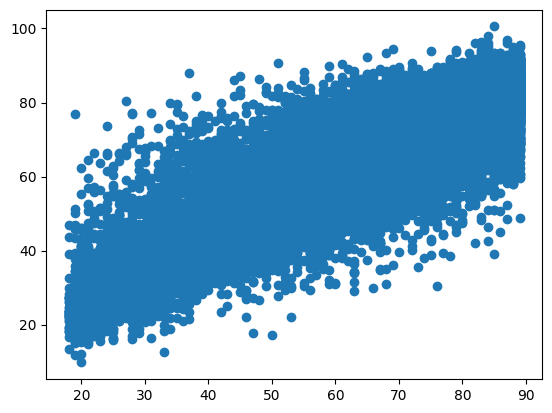

In [80]:
import matplotlib.pyplot as plt

plt.scatter(dat.admission_age, dat.age_pred)

In [81]:
dat['age_delta'] = dat['age_pred'] - dat['admission_age']

In [82]:
dat['age_delta_quant'] = pd.qcut(dat['age_delta'], q = 10)

In [83]:
dat['icu_mort'] = (dat['icu_outtime'] >= dat['dischtime']) & (dat['hospital_expire_flag'] == 1)

In [93]:
agg_dat = dat.groupby('age_delta_quant').agg({'hospital_expire_flag': 'mean', 'icu_mort': 'mean'})
agg_dat

,hospital_expire_flag,icu_mort
age_delta_quant,,
"(-45.922, -8.505]",0.147778,0.097044
"(-8.505, -5.067]",0.125902,0.083081
"(-5.067, -2.866]",0.120084,0.082848
"(-2.866, -0.986]",0.122411,0.085176
"(-0.986, 0.673]",0.112378,0.074686
"(0.673, 2.407]",0.112689,0.072177
"(2.407, 4.279]",0.099604,0.061904
"(4.279, 6.584]",0.106586,0.069351
"(6.584, 10.186]",0.090528,0.065394


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(-45.922, -8.505]'),
  Text(1, 0, '(-8.505, -5.067]'),
  Text(2, 0, '(-5.067, -2.866]'),
  Text(3, 0, '(-2.866, -0.986]'),
  Text(4, 0, '(-0.986, 0.673]'),
  Text(5, 0, '(0.673, 2.407]'),
  Text(6, 0, '(2.407, 4.279]'),
  Text(7, 0, '(4.279, 6.584]'),
  Text(8, 0, '(6.584, 10.186]'),
  Text(9, 0, '(10.186, 58.001]')])

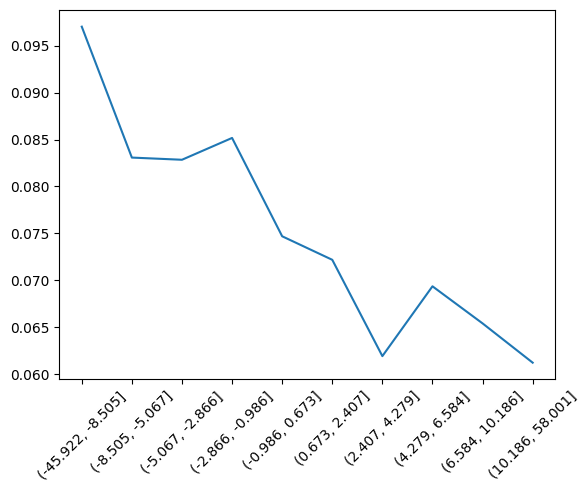

In [108]:
plt.plot(agg_dat.index.astype('str'), agg_dat['icu_mort'])
plt.xticks(rotation=45)

In [87]:
dat[dat.age_delta < -20]

,subject_id,hadm_id,stay_id,gender,admission_age,admittime,dischtime,icu_intime,icu_outtime,hospital_expire_flag,study_id,ecg_time,ecg_order,age_pred,age_delta,age_delta_quant,icu_mort
840,11645882,27041358,31734432,M,33,2179-03-01 12:00:00,2179-03-03 13:24:00,2179-03-01 12:19:00,2179-03-03 13:31:35,0,47581417,2179-03-01 12:21:00,1,12.482687,-20.517313,"(-45.922, -8.505]",False
9328,13465885,28264521,30325183,M,46,2185-09-10 12:54:00,2185-09-16 15:30:00,2185-09-10 13:51:00,2185-09-12 01:27:03,0,44453247,2185-09-10 15:04:00,1,21.950041,-24.049959,"(-45.922, -8.505]",False
9929,11496710,26342436,36819484,F,47,2125-04-08 03:29:00,2125-04-09 19:00:00,2125-04-08 05:33:00,2125-04-08 16:10:46,0,45936191,2125-04-08 00:27:00,1,17.665796,-29.334204,"(-45.922, -8.505]",False
10557,17367864,26068682,31348359,F,48,2174-08-18 23:04:00,2174-08-22 11:00:00,2174-08-19 00:23:00,2174-08-19 14:38:52,0,45654887,2174-08-18 21:43:00,1,26.728392,-21.271608,"(-45.922, -8.505]",False
11903,18893120,26595666,34280641,M,50,2191-05-07 16:39:00,2191-06-01 17:55:00,2191-05-08 01:44:31,2191-05-17 11:46:57,0,40264309,2191-05-08 05:40:00,1,17.156700,-32.843300,"(-45.922, -8.505]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72149,19355136,20999998,35952057,M,89,2179-11-03 18:32:00,2179-11-20 19:40:00,2179-11-09 09:25:43,2179-11-12 23:26:26,0,42169292,2179-11-09 08:08:00,1,59.587093,-29.412907,"(-45.922, -8.505]",False
72150,13352038,22830914,37501527,F,89,2158-01-17 13:11:00,2158-01-20 17:00:00,2158-01-17 13:11:34,2158-01-19 18:51:04,0,43911555,2158-01-17 13:18:00,1,67.630089,-21.369911,"(-45.922, -8.505]",False
72186,12736592,27896326,34243329,M,89,2151-02-18 05:22:00,2151-02-22 01:04:00,2151-02-18 18:56:46,2151-02-20 14:14:58,0,41803291,2151-02-18 13:43:00,1,66.929932,-22.070068,"(-45.922, -8.505]",False
72202,18769728,24424935,39671575,F,89,2205-11-29 10:30:00,2205-12-15 16:30:00,2205-11-30 11:40:45,2205-12-06 11:51:25,0,41175202,2205-11-30 19:39:00,1,48.841740,-40.158260,"(-45.922, -8.505]",False
